In [3]:
import numpy as np

def A_matrix(n):
    A = np.zeros((n-1, n-1))
    for i in range(0, len(A)):
        for j in range(len(A[i])):
            if j == i - 1:
                A[i][j] = 16/12
            elif j == i:
                A[i][j] = -30/12
            elif j == i + 1:
                A[i][j] = 16/12
            elif j == i - 2:
                A[i][j] = -1/12
            elif j == i + 2:
                A[i][j] = -1/12
            else:
                A[i][j] = 0

    A[0][0] = -2
    A[0][1] = 1
    A[0][2] = 0
    A[n-2][n-2] = -2
    A[n-2][n-3] = 1
    A[n-2][n-4] = 0

    return A



In [4]:
import numpy as np

def u_exact(x, t, a, b, T):
    L = b-a
    u_e = np.sin(np.pi*x/L)*np.cos(np.pi*t/T)

    return u_e



def g_function(x, t, a, b, T, c_squared):
    
    L = b-a

    af = 1
    bf = 1

    g = np.sin(np.pi*x/L)*np.cos(np.pi*t/T)*(c_squared*af**2*np.pi**2/(L**2) - bf**2*np.pi**2/(T**2))

    return g


def ibvp_step(x, state, n, deltat, deltax, tk, a, b, A, I, c_squared, T):
    
    gt = g_function(x, tk, a, b, T, c_squared)
    
    gt1 = g_function(x, tk+deltat, a, b, T, c_squared)

    gt_concat = np.concatenate((np.zeros((n-1)), gt), axis=0)
    gt1_concat = np.concatenate((np.zeros((n-1)), gt1), axis=0)


    UL = np.zeros((n-1, n-1))
    UR = I
    LL = c_squared/(deltax**2)*A
    LR = np.zeros((n-1, n-1))

    temp1 = np.concatenate((UL,UR), axis=1)
    temp2 = np.concatenate((LL,LR), axis=1)
    f_matrix = np.concatenate((temp1,temp2), axis=0)

    I_concat = np.identity(2*n-2)

    LHS = I_concat - 1/2*deltat*f_matrix
    RHS = state + (1/2*deltat*((np.matmul(f_matrix, state)) + gt_concat + gt1_concat))

    state_updated = np.linalg.solve(LHS, RHS)
    
    return state_updated
    

def solve_ibvp(state_initial, deltat, deltax, T, a, b, c_squared):
    n = int(abs((b-a)/deltax))
    nt = int(abs(T/deltat))
    x = np.linspace(a+deltax, b-deltax, num=n-1)
    t = np.linspace(0, T, num=nt+1)
    A = A_matrix(n)
    I = np.identity(n-1)
    
    state_hat = [state_initial]
    for h in range(len(t)-1):
        state_updated = ibvp_step(x, state_hat[h], n, deltat, deltax, t[h], a, b, A, I, c_squared, T)
        state_hat.append(state_updated)
    
    state_hat = np.array(state_hat)

    return state_hat, x, t

In [5]:
import numpy as np

a = 0
b = 1
L = b-a
c_squared = 68.9e9 / 2710
deltat = 0.01
deltax = 0.001
T = 1
n = int(abs((b-a)/deltax))
nt = int(abs(T/deltat))
x = np.linspace(a+deltax, b-deltax, num=n-1)

ui = np.sin(np.pi*x/L)
vi = np.zeros((n-1))
initial_state = np.concatenate((ui, vi), axis=0)


state_hat, x, t = solve_ibvp(initial_state, deltat, deltax, T, a, b, c_squared)



In [6]:
u_true = []

for d in range(len(t)):
    utk = u_exact(x, t[d], a, b, T)
    u_true.append(utk)

u_true = np.array(u_true)

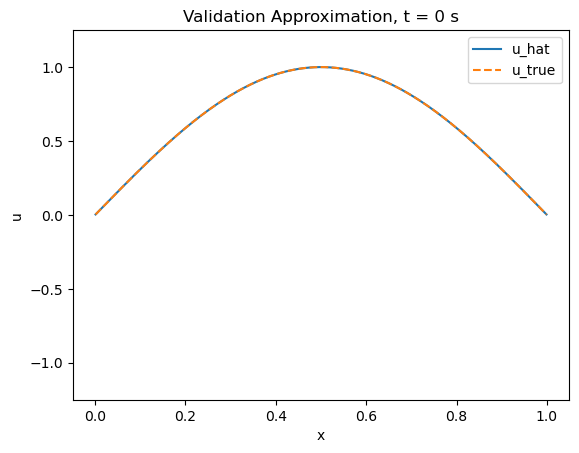

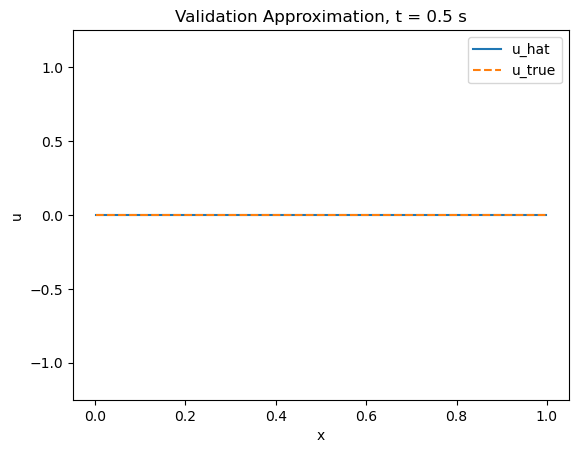

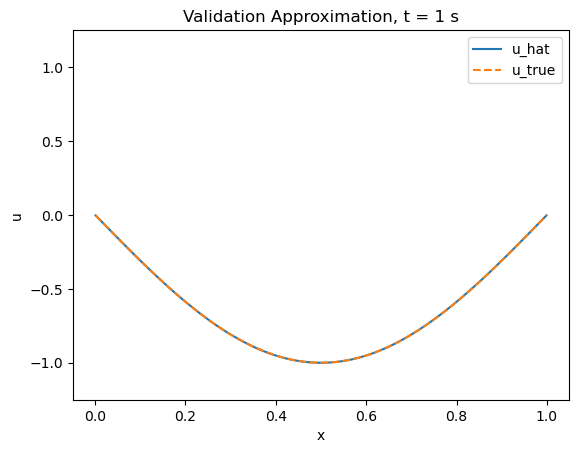

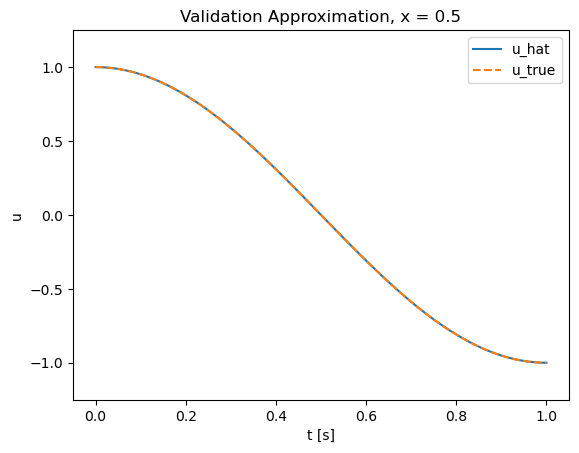

In [13]:
import matplotlib.pyplot as plt
import numpy as np

state_hat_split = np.hsplit(state_hat, 2)

uhat = state_hat_split[0]
vhat = state_hat_split[1]

plt.plot(x, state_hat_split[0][0], label='u_hat')
plt.plot(x, u_true[0],linestyle='dashed', label='u_true')
plt.legend()

plt.title('Validation Approximation, t = 0 s')
plt.xlabel('x')
plt.ylabel('u')

plt.ylim(-1.25,1.25)
plt.show()


plt.plot(x, state_hat_split[0][50], label='u_hat')
plt.plot(x, u_true[50],linestyle='dashed', label='u_true')
plt.legend()
plt.title('Validation Approximation, t = 0.5 s')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1.25,1.25)
plt.show()


plt.plot(x, state_hat_split[0][100], label='u_hat')
plt.plot(x, u_true[100],linestyle='dashed', label='u_true')
plt.legend()
plt.title('Validation Approximation, t = 1 s')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1.25,1.25)
plt.show()


uhat_temp = np.transpose(uhat)
utrue_temp = np.transpose(u_true)

plt.plot(t, uhat_temp[500], label='u_hat')
plt.plot(t, utrue_temp[500],linestyle='dashed', label='u_true')
plt.legend()
plt.title('Validation Approximation, x = 0.5')
plt.xlabel('t [s]')
plt.ylabel('u')
plt.ylim(-1.25,1.25)
plt.show()


# print(u_true[500])
# print(t[500])
# print(c_squared)



#print(uhat)